# Artificial Neural Networks
## From chapter 14 - Artificial Intelligence with Python

### Building a Perceptron based classifier

In [1]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [2]:
# Load input data
text1 = np.loadtxt('data_perceptron.txt')

In [3]:
# Separate datapoints and labels
data1 = text1[:, :2]
labels1 = text1[:, 2].reshape((text1.shape[0], 1))

Text(0.5, 1.0, 'Input data')

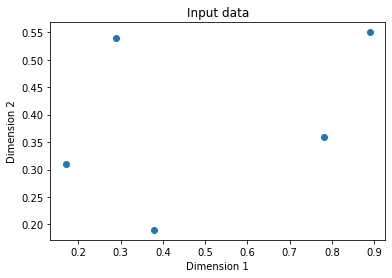

In [4]:
# Plot input data
plt.figure()
plt.scatter(data1[:,0], data1[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

In [5]:
# Define minimum and maximum values for each dimension
dim1_min, dim1_max, dim2_min, dim2_max = 0, 1, 0, 1

In [6]:
# Number of neurons in the output layer
num_output1 = labels1.shape[1]

In [7]:
# Define a perceptron with 2 input neurons (because we have 2 dimensions in the input data)
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
perceptron = nl.net.newp([dim1, dim2], num_output1)

In [8]:
# Train the perceptron using the data
error_progress1 = perceptron.train(data1, labels1, epochs=100, show=20, lr=0.03)

The goal of learning is reached


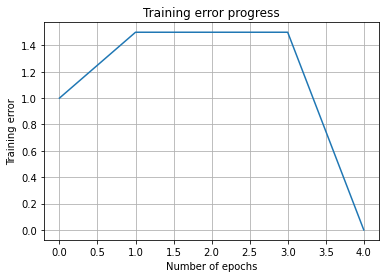

In [9]:
# Plot the training progress
plt.figure()
plt.plot(error_progress1)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()
plt.show()

### Constructing a single layer neural network

In [10]:
# Load input data
text2 = np.loadtxt('data_simple_nn.txt')

In [11]:
# Separate it into datapoints and labels
data2 = text2[:, 0:2]
labels2 = text2[:, 2:]

Text(0.5, 1.0, 'Input data')

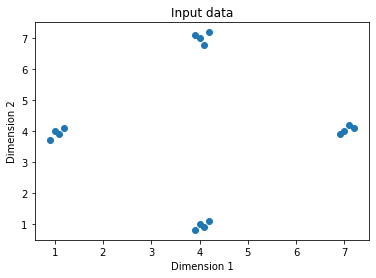

In [12]:
# Plot input data
plt.figure()
plt.scatter(data2[:,0], data2[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

In [13]:
# Minimum and maximum values for each dimension
dim1_min, dim1_max = data2[:,0].min(), data2[:,0].max()
dim2_min, dim2_max = data2[:,1].min(), data2[:,1].max()

In [14]:
# Define the number of neurons in the output layer
num_output2 = labels2.shape[1]

In [15]:
# Define a single-layer neural network
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
nn = nl.net.newp([dim1, dim2], num_output2)

In [16]:
# Train the neural network
error_progress2 = nn.train(data2, labels2, epochs=100, show=20, lr=0.03)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


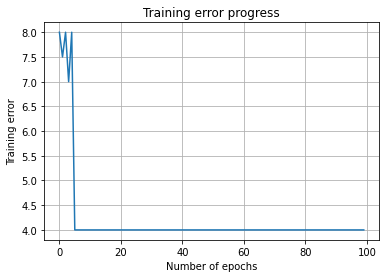

In [17]:
# Plot the training progress
plt.figure()
plt.plot(error_progress2)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()
plt.show()

In [18]:
# Run the classifier on test datapoints
print('\nTest results:')
data_test = [[0.4, 4.3], [4.4, 0.6], [4.7, 8.1]]
for item in data_test:
    print(item, '-->', nn.sim([item])[0])


Test results:
[0.4, 4.3] --> [0. 0.]
[4.4, 0.6] --> [1. 0.]
[4.7, 8.1] --> [1. 1.]


### Constructing a multilayer neural network

In [19]:
# Generate some training data
min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)

In [20]:
# Create data and labels
data3 = x.reshape(num_points, 1)
labels3 = y.reshape(num_points, 1)

Text(0.5, 1.0, 'Input data')

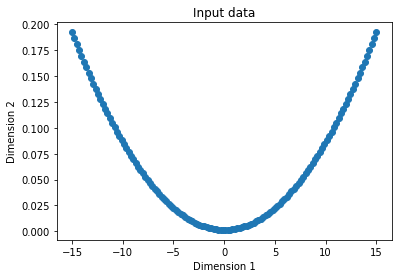

In [21]:
# Plot input data
plt.figure()
plt.scatter(data3, labels3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

In [22]:
# Define a multilayer neural network with 2 hidden layers;
# First hidden layer consists of 10 neurons
# Second hidden layer consists of 6 neurons
# Output layer consists of 1 neuron
nn1 = nl.net.newff([[min_val, max_val]], [10, 6, 1])

In [23]:
# Set the training algorithm to gradient descent
nn1.trainf = nl.train.train_gd

In [24]:
# Train the neural network
error_progress3 = nn1.train(data3, labels3, epochs=2000, show=100, goal=0.01)

Epoch: 100; Error: 0.18400399367474546;
Epoch: 200; Error: 0.012987170150593464;
The goal of learning is reached


In [25]:
# Run the neural network on training datapoints
output = nn1.sim(data3)
y_pred = output.reshape(num_points)

Text(0.5, 1.0, 'Training error progress')

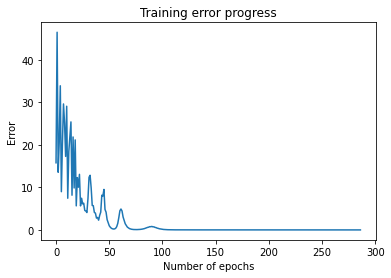

In [26]:
# Plot training error
plt.figure()
plt.plot(error_progress3)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')

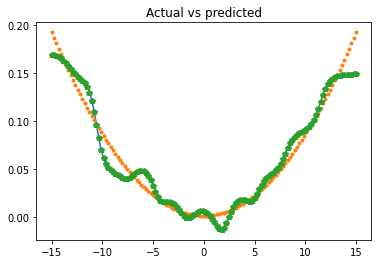

In [27]:
# Plot the output
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn1.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)

plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs predicted')

plt.show()

## From chapter 6 - Mastering Machine Learning with Python in Six Steps
### Perceptron – Single Artificial Neuron

In [28]:
# Importing packages
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap

In [29]:
# Let's use sklearn make_classification function to create some test data.
from sklearn.datasets import make_classification
X, y = make_classification(20, 2, 2, 0, weights=[.5, .5], random_state=2017)

c:\users\praab\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_informative=2, n_redundant=0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0, 0.5, 'X2')

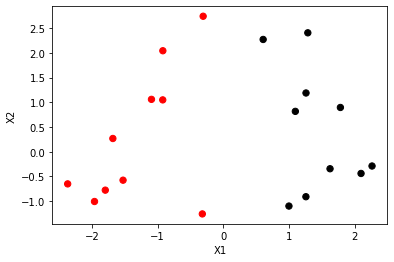

In [30]:
# Plot the data
colormap = np.array(['r', 'k'])
plt.scatter(X[:,0], X[:,1], c=colormap[y], s=40)
plt.xlabel('X1')
plt.ylabel('X2')

In [31]:
# Create the model
clf = Perceptron(max_iter=100, tol = 0.20, verbose=0, random_state=2019, fit_intercept=True, eta0=0.002)
clf.fit(X,y)

Perceptron(eta0=0.002, max_iter=100, random_state=2019, tol=0.2)

In [32]:
# Print the results
print ("Prediction: " + str(clf.predict(X)))
print ("Actual:     " + str(y))
print ("Accuracy:   " + str(clf.score(X, y)*100) + "%")

Prediction: [1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1]
Actual:     [1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1]
Accuracy:   100.0%


In [33]:
# Output the values
print ("X1 Coefficient: " + str(clf.coef_[0,0]))
print ("X2 Coefficient: " + str(clf.coef_[0,1]))
print ("Intercept:      " + str(clf.intercept_))

X1 Coefficient: 0.008824229804007558
X2 Coefficient: 5.973810619367033e-05
Intercept:      [0.]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


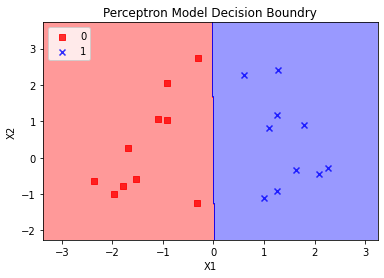

In [34]:
# Plot the decision boundary using cusom function ‘plot_decision_regions’
def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        
plot_decision_regions(X, y, classifier=clf)
plt.title('Perceptron Model Decision Boundry')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()

### Multilayer Perceptrons (Feedforward Neural Network)

In [35]:
# Importing packages
import pandas as pd

from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml

In [36]:
np.random.seed(seed=2017)
# Load data
digits = load_digits()
print('We have %d samples'%len(digits.target))

We have 1797 samples


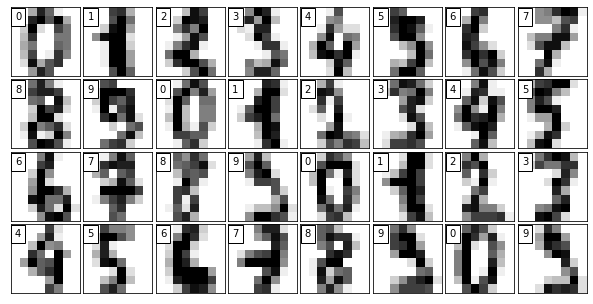

In [37]:
# Plot the first 32 samples to get a sense of the data
fig = plt.figure(figsize = (8,8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(32):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],  cmap=plt.cm.gray_r)
    ax.text(0, 1, str(digits.target[i]), bbox=dict(facecolor='white'))

In [38]:
# Split data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=2017)
print ('Number of samples in training set: %d' %(len(y_train)))
print ('Number of samples in test set: %d' %(len(y_test)))

Number of samples in training set: 1437
Number of samples in test set: 360


In [39]:
# Standardise data, and fit only to the training data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [40]:
# Apply the transformations to the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', max_iter = 500)

In [42]:
# Train the classifier with the traning data
mlp.fit(X_train_scaled,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=100, max_iter=500)

In [43]:
print("Training set score: %f" % mlp.score(X_train_scaled, y_train))
print("Test set score: %f" % mlp.score(X_test_scaled, y_test))

Training set score: 1.000000
Test set score: 0.983333


In [44]:
# Predict results from the test data
X_test_predicted = mlp.predict(X_test_scaled)

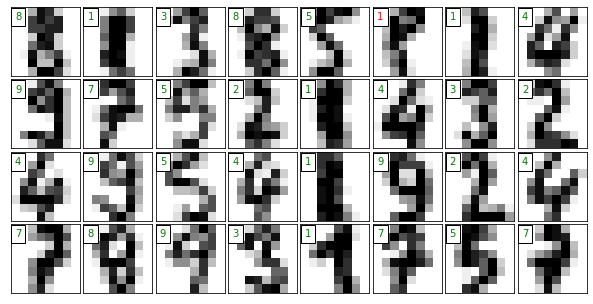

In [45]:
fig = plt.figure(figsize=(8, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot the digits: each image is 8x8 pixels
for i in range(32):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.gray_r)

    # label the image with the target value
    if X_test_predicted[i] == y_test[i]:
        ax.text(0, 1, X_test_predicted[i], color='green', bbox=dict(facecolor='white'))
    else:
        ax.text(0, 1, X_test_predicted[i], color='red', bbox=dict(facecolor='white'))

### Restricted Boltzman Machines (RBM)

In [46]:
# Importing the necessary packages
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import BernoulliRBM
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import datasets
from scipy.ndimage import convolve

Let’s nudge the dataset set by moving the 8x8 images by 1 pixel on the left, right, down, and up to convolute the image.

In [47]:
# Function to nudge the dataset
def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    shift = lambda x, w: convolve(x.reshape((8, 8)), mode='constant', weights=w).ravel()
    X = np.concatenate([X] + [np.apply_along_axis(shift, 1, X, vector) for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    
    return X, Y

In [48]:
# Load Data
digits = datasets.load_digits()
X = np.asarray(digits.data, 'float32')

X, y = nudge_dataset(X, digits.target)

In [49]:
# Scale the features such that the values are between 0-1 scale
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2017)
print (X.shape)
print (y.shape)

(8985, 64)
(8985,)


In [51]:
# Gridsearch for logistic regression
# Perform a grid search on the 'C' parameter of Logistic
params = {"C": [1.0, 10.0, 100.0]}

gs = GridSearchCV(LogisticRegression(), params, n_jobs = -1, verbose = 1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\users\praab\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.0, 10.0, 100.0]}, verbose=1)

In [52]:
# Print diagnostic information to the user and grab the
print ("Best Score: %0.3f" % (gs.best_score_))

Best Score: 0.791


In [53]:
# Best model
bestParams = gs.best_estimator_.get_params()

print (bestParams.items())

dict_items([('C', 100.0), ('class_weight', None), ('dual', False), ('fit_intercept', True), ('intercept_scaling', 1), ('l1_ratio', None), ('max_iter', 100), ('multi_class', 'auto'), ('n_jobs', None), ('penalty', 'l2'), ('random_state', None), ('solver', 'lbfgs'), ('tol', 0.0001), ('verbose', 0), ('warm_start', False)])


In [54]:
# Evaluate using Logistic Regression and only the raw pixel
logistic = LogisticRegression(C = 100)
logistic.fit(X_train, y_train)

print ("Train accuracy: ", metrics.accuracy_score(y_train, logistic.predict(X_train)))
print ("Test accuracy: ", metrics.accuracy_score(y_test, logistic.predict(X_test)))

Train accuracy:  0.8149693934335003
Test accuracy:  0.8041179744017808


c:\users\praab\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Grid search for RBM + Logistic Regression model

We perform a grid search on the learning rate, number of iterations, and number of components on the RBM and C for Logistic Regression.

In [55]:
# Initialize the RBM + Logistic Regression pipeline
rbm = BernoulliRBM()
logistic = LogisticRegression()
classifier = Pipeline([("rbm", rbm), ("logistic", logistic)])

params = {
    "rbm__learning_rate": [0.1, 0.01, 0.001],
    "rbm__n_iter": [20, 40, 80],
    "rbm__n_components": [50, 100, 200],
    "logistic__C": [1.0, 10.0, 100.0]}

In [56]:
# Perform a grid search over the parameter
Grid_Search = GridSearchCV(classifier, params, n_jobs = -1, verbose = 1)
Grid_Search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\users\praab\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=Pipeline(steps=[('rbm', BernoulliRBM()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [1.0, 10.0, 100.0],
                         'rbm__learning_rate': [0.1, 0.01, 0.001],
                         'rbm__n_components': [50, 100, 200],
                         'rbm__n_iter': [20, 40, 80]},
             verbose=1)

In [57]:
# Print diagnostic information to the user and grab the best model
print ("Best Score: %0.3f" % (Grid_Search.best_score_))
print ("RBM + Logistic Regression parameters")
bestParams = Grid_Search.best_estimator_.get_params()

# Loop over the parameters and print each of them out so they can be manually set
for p in sorted(params.keys()):
    print ("\t %s: %f" % (p, bestParams[p]))

Best Score: 0.914
RBM + Logistic Regression parameters
	 logistic__C: 100.000000
	 rbm__learning_rate: 0.100000
	 rbm__n_components: 200.000000
	 rbm__n_iter: 20.000000


In [58]:
# Initialize the RBM + Logistic Regression classifier with the cross-validated parameters
rbm = BernoulliRBM(n_components = 200, n_iter = 100, learning_rate = 0.1,  verbose = False)
logistic = LogisticRegression(C = 100)

In [59]:
# Train the classifier and show an evaluation report
classifier = Pipeline([("rbm", rbm), ("logistic", logistic)])
classifier.fit(X_train, y_train)

c:\users\praab\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('rbm',
                 BernoulliRBM(n_components=200, n_iter=100, verbose=False)),
                ('logistic', LogisticRegression(C=100))])

In [60]:
print (metrics.accuracy_score(y_train, classifier.predict(X_train)))
print (metrics.accuracy_score(y_test, classifier.predict(X_test)))

0.9401780745687257
0.9293266555370061


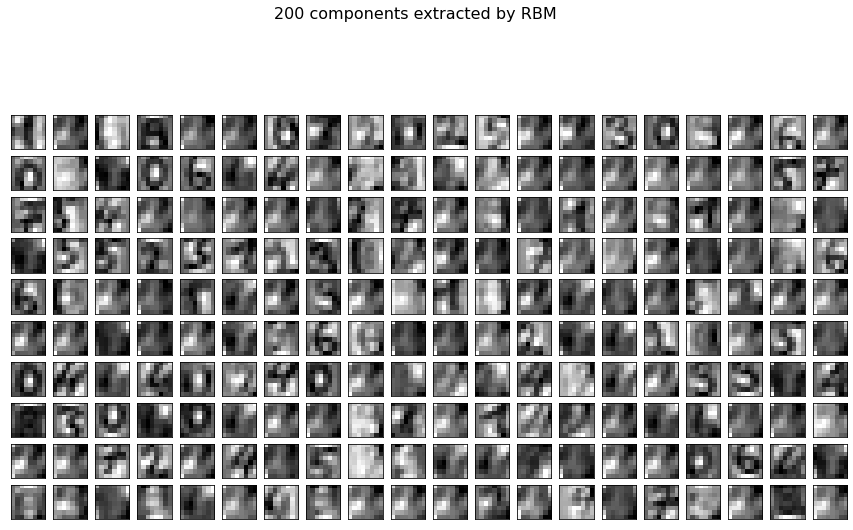

In [61]:
# Plot RBM components
plt.figure(figsize=(15, 15))

for i, comp in enumerate(rbm.components_):
    plt.subplot(20, 20, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    
plt.suptitle('200 components extracted by RBM', fontsize=16)
plt.show()

### MLP Using Keras

In [62]:
# Importing the necessary packages
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Dropout, Input
from keras.models import Model
from keras.utils import np_utils

# From keras.utils.visualize_util import plot
from IPython.display import SVG
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import model_to_dot, plot_model

In [63]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [64]:
nb_classes = 10 # class size
input_unit_size = 28*28 # flatten 28*28 images to a 784 vector for each image

X_train = X_train.reshape(X_train.shape[0], input_unit_size)
X_test = X_test.reshape(X_test.shape[0], input_unit_size)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [65]:
# Scale the values by dividing 255 i.e., means foreground (black)
X_train /= 255
X_test /= 255

In [66]:
# One-hot representation, required for multiclass problems
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [67]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 784)
60000 train samples
10000 test samples


In [68]:
# Create model
model = Sequential()
model.add(Dense(input_unit_size, input_dim=input_unit_size, kernel_initializer='normal', activation='relu'))
model.add(Dense(nb_classes, kernel_initializer='normal', activation='softmax'))

In [69]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
# Model training
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=500, verbose=2)

Epoch 1/5
120/120 - 3s - loss: 0.3695 - accuracy: 0.8972 - val_loss: 0.1835 - val_accuracy: 0.9474
Epoch 2/5
120/120 - 1s - loss: 0.1529 - accuracy: 0.9569 - val_loss: 0.1233 - val_accuracy: 0.9636
Epoch 3/5
120/120 - 1s - loss: 0.1043 - accuracy: 0.9705 - val_loss: 0.1012 - val_accuracy: 0.9703
Epoch 4/5
120/120 - 2s - loss: 0.0769 - accuracy: 0.9781 - val_loss: 0.0812 - val_accuracy: 0.9755
Epoch 5/5
120/120 - 1s - loss: 0.0592 - accuracy: 0.9839 - val_loss: 0.0777 - val_accuracy: 0.9764


In [71]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

Error: 2.36%


## From chapter 14 - Artificial Intelligence with Python
### Building a vector quantizer

In [72]:
import neurolab as nl
# Load input data
text3 = np.loadtxt('data_vector_quantization.txt')

In [73]:
# Separate it into data and labels
data4 = text3[:, 0:2]
labels4 = text3[:, 2:]

In [74]:
# Define a neural network with 2 layers:
# 10 neurons in input layer and 4 neurons in output layer
num_input_neurons = 10
num_output_neurons = 4
weights = [1/num_output_neurons] * num_output_neurons
nn2 = nl.net.newlvq(nl.tool.minmax(data4), num_input_neurons, weights)

In [75]:
# Train the neural network
_ = nn2.train(data4, labels4, epochs=500, goal=-1)

Epoch: 100; Error: 0.0;
Epoch: 200; Error: 0.0;
Epoch: 300; Error: 0.0;
Epoch: 400; Error: 0.0;
Epoch: 500; Error: 0.0;
The maximum number of train epochs is reached


In [76]:
# Create the input grid
xx, yy = np.meshgrid(np.arange(0, 10, 0.2), np.arange(0, 10, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
grid_xy = np.concatenate((xx, yy), axis=1)

In [77]:
# Evaluate the input grid of points
grid_eval = nn2.sim(grid_xy)

In [78]:
# Define the 4 classes
class_1 = data4[labels4[:,0] == 1]
class_2 = data4[labels4[:,1] == 1]
class_3 = data4[labels4[:,2] == 1]
class_4 = data4[labels4[:,3] == 1]

In [79]:
# Define X-Y grids for all the 4 classes
grid_1 = grid_xy[grid_eval[:,0] == 1]
grid_2 = grid_xy[grid_eval[:,1] == 1]
grid_3 = grid_xy[grid_eval[:,2] == 1]
grid_4 = grid_xy[grid_eval[:,3] == 1]

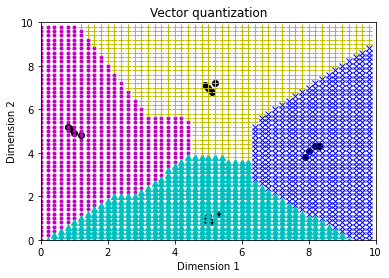

In [80]:
# Plot the outputs 
plt.plot(class_1[:,0], class_1[:,1], 'ko', 
        class_2[:,0], class_2[:,1], 'ko', 
        class_3[:,0], class_3[:,1], 'ko', 
        class_4[:,0], class_4[:,1], 'ko')

plt.plot(grid_1[:,0], grid_1[:,1], 'm.',
        grid_2[:,0], grid_2[:,1], 'bx',
        grid_3[:,0], grid_3[:,1], 'c^', 
        grid_4[:,0], grid_4[:,1], 'y+')

plt.axis([0, 10, 0, 10])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Vector quantization')

plt.show()

### Analyzing sequential data using recurrent neural networks

In [81]:
# Define a function to generate the waveforms
def get_data(num_points):
    # Create sine waveforms
    wave_1 = 0.5 * np.sin(np.arange(0, num_points))
    wave_2 = 3.6 * np.sin(np.arange(0, num_points))
    wave_3 = 1.1 * np.sin(np.arange(0, num_points))
    wave_4 = 4.7 * np.sin(np.arange(0, num_points))
    
    # Create varying amplitudes
    amp_1 = np.ones(num_points)
    amp_2 = 2.1 + np.zeros(num_points)
    amp_3 = 3.2 * np.ones(num_points)
    amp_4 = 0.8 + np.zeros(num_points)
    
    # Create the overall waveform
    wave = np.array([wave_1, wave_2, wave_3, wave_4]).reshape(num_points * 4, 1)
    amp = np.array([[amp_1, amp_2, amp_3, amp_4]]).reshape(num_points * 4, 1)

    return wave, amp

In [82]:
# Visualize the output 
def visualize_output(nn, num_points_test):
    wave, amp = get_data(num_points_test)
    output = nn.sim(wave)
    plt.plot(amp.reshape(num_points_test * 4))
    plt.plot(output.reshape(num_points_test * 4))

Epoch: 100; Error: 0.7550483108134858;
Epoch: 200; Error: 0.5307767891237918;
Epoch: 300; Error: 0.46224509086888654;
Epoch: 400; Error: 0.8431051358225254;
Epoch: 500; Error: 1.2292412046628483;
Epoch: 600; Error: 0.5921124317216602;
Epoch: 700; Error: 0.842590181453718;
Epoch: 800; Error: 0.8140558624200768;
Epoch: 900; Error: 0.7277257060666684;
Epoch: 1000; Error: 0.7198120077275123;
Epoch: 1100; Error: 0.6970001060484144;
Epoch: 1200; Error: 0.6885630379199768;
The maximum number of train epochs is reached


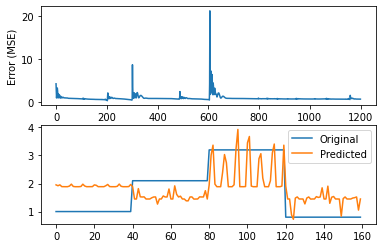

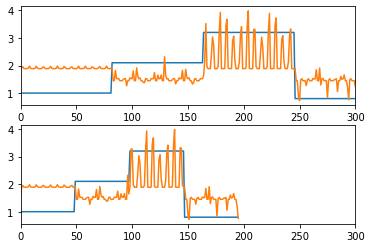

In [83]:
if __name__=='__main__':
    # Create some sample data
    num_points = 40
    wave, amp = get_data(num_points)

    # Create a recurrent neural network with 2 layers
    nn3 = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()])

    # Set the init functions for each layer 
    nn3.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
    nn3.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
    nn3.init()

    # Train the recurrent neural network
    error_progress4 = nn3.train(wave, amp, epochs=1200, show=100, goal=0.01)

    # Run the training data through the network
    output = nn3.sim(wave)

    # Plot the results
    plt.subplot(211)
    plt.plot(error_progress4)
    plt.xlabel('Number of epochs')
    plt.ylabel('Error (MSE)')

    plt.subplot(212)
    plt.plot(amp.reshape(num_points * 4))
    plt.plot(output.reshape(num_points * 4))
    plt.legend(['Original', 'Predicted'])

    # Testing the network performance on unknown data 
    plt.figure()

    plt.subplot(211)
    visualize_output(nn3, 82)
    plt.xlim([0, 300])

    plt.subplot(212)
    visualize_output(nn3, 49)
    plt.xlim([0, 300])

    plt.show()

### Visualizing characters in an Optical Character Recognition database

In [84]:
# Importing the necessary packages
import os
import sys

import cv2

In [85]:
# Define the input file
input_file = 'letter.data'

In [86]:
# Define the visualization parameters
img_resize_factor = 12
start = 6
end = -1
height, width = 16, 8

In [87]:
# Iterate until the user presses the Esc key
with open(input_file, 'r') as f:
    for line in f.readlines():
        # Read the data
        data = np.array([255 * float(x) for x in line.split('\t')[start:end]])

        # Reshape the data into a 2D image
        img = np.reshape(data, (height, width))

        # Scale the image
        img_scaled = cv2.resize(img, None, fx=img_resize_factor, fy=img_resize_factor)

        # Display the image
        cv2.imshow('Image', img_scaled)

        # Check if the user pressed the Esc key
        c = cv2.waitKey()
        if c == 27:
            break

### Building an Optical Character Recognition engine

In [88]:
# Define the number of datapoints to be loaded from the input file
num_datapoints = 50

In [89]:
# String containing all the distinct characters
orig_labels = 'omandig'

In [90]:
# Compute the number of distinct characters
num_orig_labels = len(orig_labels)

In [91]:
# Define the training and testing parameters
num_train = int(0.9 * num_datapoints)
num_test = num_datapoints - num_train

In [92]:
# Define the dataset extraction parameters 
start = 6
end = -1

In [93]:
# Creating the dataset
data5 = []
labels5 = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        # Split the current line tabwise
        list_vals = line.split('\t')

        # Check if the label is in our ground truth labels. If not, we should skip it.
        if list_vals[1] not in orig_labels:
            continue

        # Extract the current label and append it to the main list
        label = np.zeros((num_orig_labels, 1))
        label[orig_labels.index(list_vals[1])] = 1
        labels5.append(label)

        # Extract the character vector and append it to the main list
        cur_char = np.array([float(x) for x in list_vals[start:end]])
        data5.append(cur_char)

        # Exit the loop once the required dataset has been created 
        if len(data5) >= num_datapoints:
            break

In [94]:
# Convert the data and labels to numpy arrays
data5 = np.asfarray(data5)
labels5 = np.array(labels5).reshape(num_datapoints, num_orig_labels)

In [95]:
# Extract the number of dimensions
num_dims = len(data5[0])

In [96]:
# Create a feedforward neural network
nn4 = nl.net.newff([[0, 1] for _ in range(len(data5[0]))], [128, 16, num_orig_labels])

In [97]:
# Set the training algorithm to gradient descent
nn4.trainf = nl.train.train_gd

In [98]:
# Train the neural network
error_progress5 = nn4.train(data5[:num_train,:], labels5[:num_train,:], epochs=10000, show=100, goal=0.01)

Epoch: 100; Error: 41.28078641647235;
Epoch: 200; Error: 31.734800372347628;
Epoch: 300; Error: 23.307250462368216;
Epoch: 400; Error: 16.649496988061927;
Epoch: 500; Error: 17.563617679012516;
Epoch: 600; Error: 11.958949342438048;
Epoch: 700; Error: 5.243322825721208;
Epoch: 800; Error: 5.020862389943336;
Epoch: 900; Error: 5.401828272535897;
Epoch: 1000; Error: 5.442712297866186;
Epoch: 1100; Error: 4.928929099042071;
Epoch: 1200; Error: 5.45814938071514;
Epoch: 1300; Error: 4.657227258737077;
Epoch: 1400; Error: 4.528128822105966;
Epoch: 1500; Error: 3.9134004505662223;
Epoch: 1600; Error: 5.3509200778994135;
Epoch: 1700; Error: 4.714502810970146;
Epoch: 1800; Error: 4.020790253734003;
Epoch: 1900; Error: 2.9383910292552367;
Epoch: 2000; Error: 2.6163622859319102;
Epoch: 2100; Error: 0.2636530068400611;
Epoch: 2200; Error: 0.14397068536163693;
Epoch: 2300; Error: 0.10173723081952579;
Epoch: 2400; Error: 0.07993737830948386;
Epoch: 2500; Error: 0.06613151131361011;
Epoch: 2600; Erro

In [99]:
# Predict the output for test inputs
print('\nTesting on unknown data:')
predicted_test = nn4.sim(data5[num_train:, :])
for i in range(num_test):
    print('\nOriginal:', orig_labels[np.argmax(labels5[i])])
    print('Predicted:', orig_labels[np.argmax(predicted_test[i])])


Testing on unknown data:

Original: o
Predicted: o

Original: m
Predicted: n

Original: m
Predicted: n

Original: a
Predicted: a

Original: n
Predicted: n


## From chapter 6 - Mastering Machine Learning with Python in Six Steps
### Recurrent Neural Network (RNN)

In [100]:
# Importing the necessary packages
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

In [101]:
max_features = 20000
maxlen = 80 # cut texts after this number of words (among top max_features most common words)
batch_size = 32

In [102]:
# Load data 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\praab\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\praab\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wit

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
X_train shape: (25000, 80)
X_test shape: (25000, 80)


In [103]:
# Model configuration
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, recurrent_dropout=0.2, dropout=0.2))  # try using a GRU instead, for fun
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [104]:
# Try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
# Train
model.fit(X_train, y_train, batch_size=batch_size, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
782/782 [==============================] - 113s 141ms/step - loss: 0.5100 - accuracy: 0.7329 - val_loss: 0.3581 - val_accuracy: 0.8424
Epoch 2/5
782/782 [==============================] - 113s 144ms/step - loss: 0.2368 - accuracy: 0.9073 - val_loss: 0.4607 - val_accuracy: 0.8210
Epoch 3/5
782/782 [==============================] - 112s 144ms/step - loss: 0.1527 - accuracy: 0.9439 - val_loss: 0.4207 - val_accuracy: 0.8320
Epoch 4/5
782/782 [==============================] - 113s 144ms/step - loss: 0.0924 - accuracy: 0.9681 - val_loss: 0.5007 - val_accuracy: 0.8256
Epoch 5/5
782/782 [==============================] - 112s 144ms/step - loss: 0.0772 - accuracy: 0.9736 - val_loss: 0.7050 - val_accuracy: 0.8207


In [106]:
# Evaluate
train_score, train_acc = model.evaluate(X_train, y_train, batch_size=batch_size)
test_score, test_acc = model.evaluate(X_test, y_test, batch_size=batch_size)

print ('Train score:', train_score)
print ('Train accuracy:', train_acc)

print ('Test score:', test_score)
print ('Test accuracy:', test_acc)

782/782 [==============================] - 12s 15ms/step - loss: 0.7050 - accuracy: 0.8207
Train score: 0.03888055682182312
Train accuracy: 0.9892399907112122
Test score: 0.7050442099571228
Test accuracy: 0.8207200169563293


### Transfer Learning

In [107]:
# Importing the necessary packages
from keras.datasets import mnist
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [127]:
batch_size = 156
nb_classes = 10
nb_epoch = 10

# Input image dimensions
img_rows, img_cols = 28, 28

# Number of convolutional filters to use
nb_filters = 32

# Size of pooling area for max pooling
pool_size = 2

# Convolution kernel size
kernel_size = 3

input_shape = (img_rows, img_cols, 1)

In [128]:
# The data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [129]:
# Create two datasets one with digits below 5 and one with 5 and above
X_train_lt5 = X_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
X_test_lt5 = X_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

X_train_gte5 = X_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5  # make classes start at 0 for
X_test_gte5 = X_test[y_test >= 5]         # np_utils.to_categorical
y_test_gte5 = y_test[y_test >= 5] - 5

In [130]:
# Train model for digits 0 to 4
def train_model(model, train, test, nb_classes):
    X_train = train[0].reshape((train[0].shape[0],) + input_shape)
    X_test = test[0].reshape((test[0].shape[0],) + input_shape)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    
    print('X_train shape:', X_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    # Convert class vectors to binary class matrices
    Y_train = np_utils.to_categorical(train[1], nb_classes)
    Y_test = np_utils.to_categorical(test[1], nb_classes)

    model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1,
              validation_data=(X_test, Y_test))
    
    score = model.evaluate(X_test, Y_test, verbose=0)
    
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [131]:
# Define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Conv2D(nb_filters, kernel_size, padding='valid', input_shape=input_shape),
    Activation('relu'),
    Conv2D(nb_filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=(pool_size, pool_size)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]


In [132]:
# Create complete model
model = Sequential(feature_layers + classification_layers)

In [133]:
# Train model for 5-digit classification [0..4]
train_model(model, (X_train_lt5, y_train_lt5), (X_test_lt5, y_test_lt5), nb_classes)

X_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Epoch 1/10
197/197 [==============================] - 21s 102ms/step - loss: 2.3108 - accuracy: 0.0727 - val_loss: 2.2790 - val_accuracy: 0.1592
Epoch 2/10
197/197 [==============================] - 19s 98ms/step - loss: 2.2708 - accuracy: 0.1552 - val_loss: 2.2328 - val_accuracy: 0.4022
Epoch 3/10
197/197 [==============================] - 19s 98ms/step - loss: 2.2244 - accuracy: 0.2325 - val_loss: 2.1748 - val_accuracy: 0.4485
Epoch 4/10
197/197 [==============================] - 20s 101ms/step - loss: 2.1655 - accuracy: 0.2973 - val_loss: 2.1029 - val_accuracy: 0.4760
Epoch 5/10
197/197 [==============================] - 20s 99ms/step - loss: 2.0933 - accuracy: 0.3227 - val_loss: 2.0139 - val_accuracy: 0.4919
Epoch 6/10
197/197 [==============================] - 19s 99ms/step - loss: 2.0042 - accuracy: 0.3526 - val_loss: 1.9051 - val_accuracy: 0.5001
Epoch 7/10
197/197 [==============================] - 20s 101m

#### Transfer existing trained model on 0 to 4 to build model for digits 5 to 9

In [125]:
# Freeze feature layers and rebuild model
for layer in feature_layers:
    layer.trainable = False

In [126]:
# Transfer: train dense layers for new classification task [5..9]
train_model(model, (X_train_gte5, y_train_gte5), (X_test_gte5, y_test_gte5), nb_classes)

X_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Epoch 1/10
230/230 [==============================] - 7s 28ms/step - loss: 1.6339 - accuracy: 0.2887 - val_loss: 1.5403 - val_accuracy: 0.3748
Epoch 2/10
230/230 [==============================] - 6s 27ms/step - loss: 1.5608 - accuracy: 0.3187 - val_loss: 1.4763 - val_accuracy: 0.4188
Epoch 3/10
230/230 [==============================] - 6s 27ms/step - loss: 1.5028 - accuracy: 0.3547 - val_loss: 1.4156 - val_accuracy: 0.4738
Epoch 4/10
230/230 [==============================] - 6s 27ms/step - loss: 1.4443 - accuracy: 0.4036 - val_loss: 1.3571 - val_accuracy: 0.5419
Epoch 5/10
230/230 [==============================] - 6s 28ms/step - loss: 1.3941 - accuracy: 0.4550 - val_loss: 1.3012 - val_accuracy: 0.6063
Epoch 6/10
230/230 [==============================] - 6s 28ms/step - loss: 1.3392 - accuracy: 0.5069 - val_loss: 1.2475 - val_accuracy: 0.6595
Epoch 7/10
230/230 [==============================] - 6s 28ms/step - l